In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [6]:
def tiraRuido(imagem, peso, maximoIteracoes=200):
    
    eps= 1e-3
    tam = 0.125
    
    v = np.zeros_like(imagem)
    px = np.zeros_like(imagem)
    py = np.zeros_like(imagem)
    nm = np.prod(imagem.shape[:2])
    
    i = 0
    for i in range(maximoIteracoes):
        v_old = v
        
        vx = np.roll(v, -1, axis=1) - v
        vy = np.roll(v, -1, axis=0) - v
        

        px_new = px + (tam / peso) * vx
        py_new = py + (tam / peso) * vy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        

        v = imagem + peso * div_p
        
        error = np.linalg.norm(v - v_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
    return v

Text(0.5, 1.0, 'com ruído')

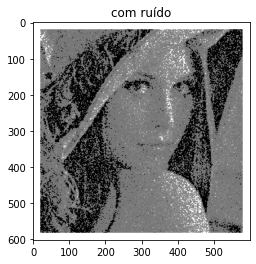

In [7]:
# abrir imagem com o noise

im = Image.open("image.bmp")
p = np.array(im)
#limita o range do vetor de 0 até 255
p = np.clip(p, 0, 255)

# plot the noisy image
plt.imshow(p, cmap = 'gray')
plt.title('com ruído')

Text(0.5, 1.0, 'diminuição de ruído leve')

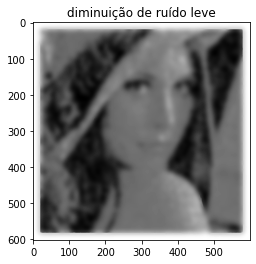

In [8]:
plt.imshow(tiraRuido(p, peso=20), cmap='gray')
plt.title('diminuição de ruído leve')

Text(0.5, 1.0, 'diminuição de ruído alta')

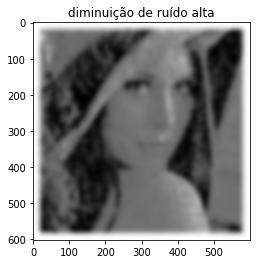

In [9]:
plt.imshow(tiraRuido(p, peso=200), cmap='gray')
plt.title('diminuição de ruído alta')